# Instructions
Project Tasks:
1. Find a dataset you want to analyze on Kaggle or another site (make sure the dataset is in one file, csv format!)
2. Create a GitHub repository for your final project and clone it in your local computer
3. Create a README.md for the repository that briefly explains why you were interested in this data and a list of at least 10 questions you want to answer using the dataset with, at least, 1 visualization per question.
4. Create a Jupyter notebook file for your data analysis in your local copy of the repository.
5. Add the dataset, Jupyter notebook file, and READMEmd to your repository, commit the changes, and push them to origin.

### Preliminary Analysis
1. Import the dataset
2. Describe the dataset
3. List all columns and datatype of each column
4. List all observations with null values if any.

**Import the dataset:**

In [136]:
# install required library
#!pip install pandas matplotlib seaborn

In [137]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset
animal_data = pd.read_csv("https://raw.githubusercontent.com/francisohara24/HtH-2023-animal-condition-analysis/master/data/data.csv")

# view first 5 rows of dataset
animal_data.head()

Animal Symptom 1             Symptom 2 Symptom 3    Symptom 4    Symptom 5  \
0    dog     fever             diarrhoea     vomit  weight loss  dehydration   
1    dog     fever             diarrhoea     cough    tiredness         pain   
2    dog     fever             diarrhoea     cough        vomit     anorexia   
3    dog     fever  breathing difficulty     cough     lethargy     sneering   
4    dog     fever             diarrhoea     cough     lethargy     blue eye   

  Dangerous  
0       yes  
1       yes  
2       yes  
3       yes  
4       yes

**Describe the dataset:**

In [138]:
# describe the dataset
animal_data.describe()

Animal Symptom 1  Symptom 2 Symptom 3    Symptom 4 Symptom 5  \
count       869       869        869       869          869       869   
unique       34       208        209       206          196       182   
top     buffalo     fever  diarrhoea     cough  weight loss      pain   
freq        128       271        125        97          117       167   

       Dangerous  
count        869  
unique         2  
top          yes  
freq         849

From the above, it can be seen that 
- There are 869 observations in the dataset.
- There are 34 unique animals in the dataset with buffalo being the most common animal in the dataset.

**List all features of the dataset as well as the data type of each feature:**

In [139]:
animal_data.dtypes

Animal       object
Symptom 1    object
Symptom 2    object
Symptom 3    object
Symptom 4    object
Symptom 5    object
Dangerous    object
dtype: object

Hence, each feature in the dataset is of type `object` which is the default datatype for representing strings in Pandas.

## Exploratory Analysis Tasks

### 1. What kinds of animals are present in the dataset and in what quantities?
The following is a histogram displaying each of the distinct animals in the dataset and the quantities in which they occur.

<Axes: xlabel='Animal', ylabel='Count'>

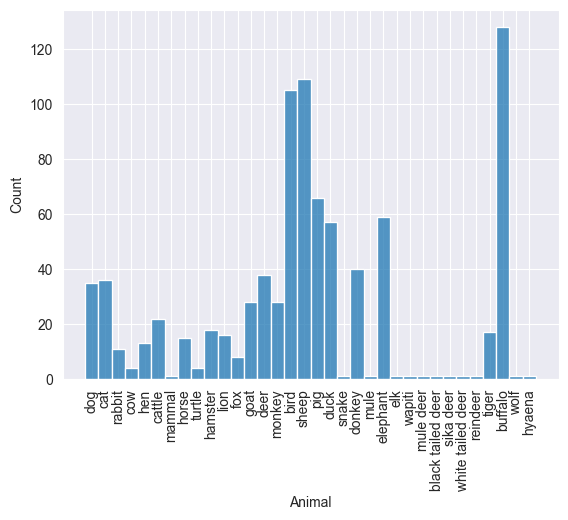

In [140]:
# rotate the x-axis labels so they can fit in the same space
plt.xticks(rotation=90)

# plot a histogram of the animals and their frequencies
sns.histplot(animal_data, x="Animal")

From the results above, some of the animals present are `dogs`, `cats`, `rabbits`, `cows`, `hen`, `cattle`, etc. and the quantities in which they occur in the dataset range from 1 to over 120.

### 2. What is the proportion of domestic animals to wild animals in the dataset?
I have arbitrarily classified the following animals in the dataset as domestic:
 - dog
 - cat
 - rabbit
 - cow
 - hen
 - cattle
 - horse
 - hamster
 - goat
 - sheep
 - pig
 - duck
 - donkey
 - mule

My hypothesis is that the dataset will contain more domestic animals than wild animals since domestic animals are easier to find than wild animals.

A good way to visualize this proportion would be with a pie chart, and the following pie chart displays the proportion of domestic animals to wild animals in the dataset:

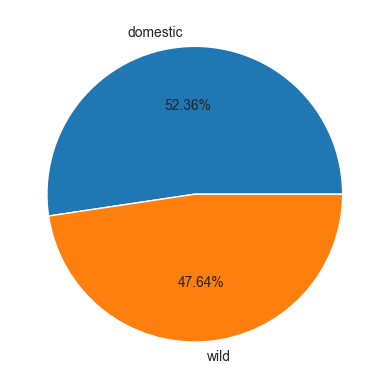

In [141]:
# define function for grouping animals
def is_wild(animal_index: int) -> str:
    """Return True if the animal at index `animal_index` is wild. Otherwise, return False."""
    domestic_animals = ["dog", "cat", "rabbit", "cow", "hen", "cattle", "horse", "hamster", "goat", "sheep", "pig", "duck", "donkey", "mule"]
    return "wild" if animal_data.loc[animal_index, "Animal"] not in domestic_animals else "domestic"

# group the data using the is_wild function
groups = animal_data.groupby(by=is_wild)

# visualize the groups on a pie chart
labels = []
values = []

for group in groups:
    labels.append(group[0])  # add group name to list of labels
    values.append(len(group[1]))  # add number of animals in group to list of values

plt.pie(values, labels=labels, autopct="%0.2f%%")
plt.show()

Hence, 52.36% of the animals in the dataset are domestic animals whereas 47.64% of the animals in the dataset are wild animals.
This is not as big of a difference as I had anticipated but still confirms my initial hypothesis.

### 3. What are the different symptoms and in what quantities do they occur?
A histogram will be a good way to visualize the distinct symptoms in the dataset and their distribution across the dataset.
 - Due to the large number of distinct symptoms present in the dataset, the size of the figure on which the histogram will be plotted will have to be increased, and the histogram will have to be plotted in the horizontal direction as opposed to the usual vertical direction.

<Axes: xlabel='Count', ylabel='Symptoms'>

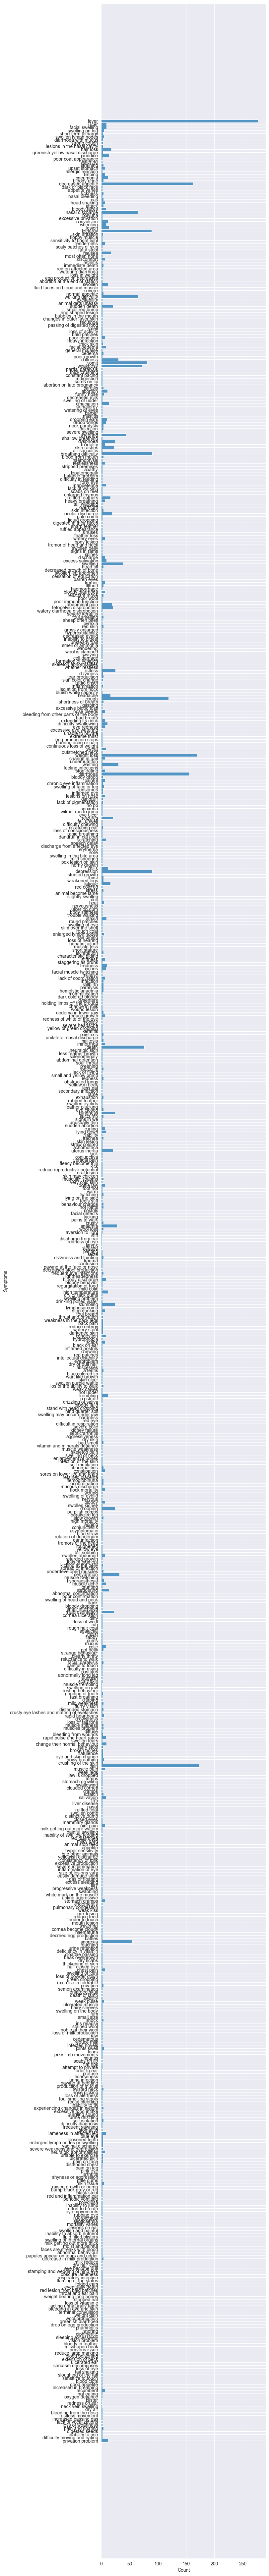

In [142]:
# merge symptoms 1 - 5 into one data series.
data = pd.concat((animal_data["Symptom 1"], animal_data["Symptom 2"], animal_data["Symptom 3"], animal_data["Symptom 4"], animal_data["Symptom 5"]))
data.name = "Symptoms"


# increase figure size to account for high number of distinct symptoms
plt.figure(figsize=(6.4, 100))

# plot the histogram horizontally
sns.histplot(y=data)

Hence, there are a variety of symptoms within the dataset ranging from `"fever"` to `"privation problem"`.

### 4. What symptom was most prevalent across the entire dataset?
A count plot would be a good way to visualize the most prevalent symptom across the entire dataset.
 - The data will first have to be sorted in descending order of the frequency of occurrence of each symptom so that the most prevalent symptom can be easily revealed.

<Axes: xlabel='count', ylabel='Symptoms'>

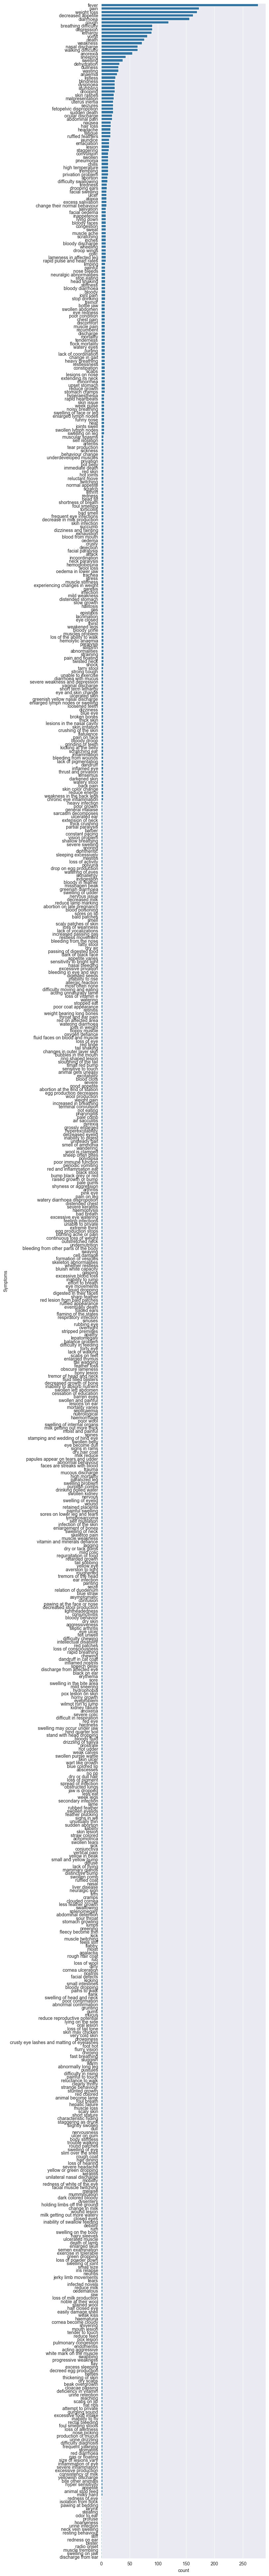

In [143]:
# define key function for sorting the data
def sorter(symptoms: pd.Series) -> list:
    """Return a list containing the number of times each value in `series` occurs."""
    symptom_counts = []
    for value in symptoms:
        symptom_counts.append(symptoms.value_counts()[value])
    return symptom_counts

# sort the data in descending order using key function
sorted_data = data.sort_values(key=sorter, ascending=False)

# change figure size to make plot easier to read
plt.figure(figsize=(6.4, 100))

# plot the count plot using sorted data
sns.countplot(sorted_data)

Based on the count plot above, `Fever` was the most prevalent symptom across the entire dataset, and it occurred about 275 times in the dataset.

### 5. What was the rarest symptom across the entire dataset?
A count plot can also be used to find the rarest symptom across the dataset.
 - The data must first be sorted in ascending order to reveal the rarest symptom in the dataset.

<Axes: xlabel='count', ylabel='Symptoms'>

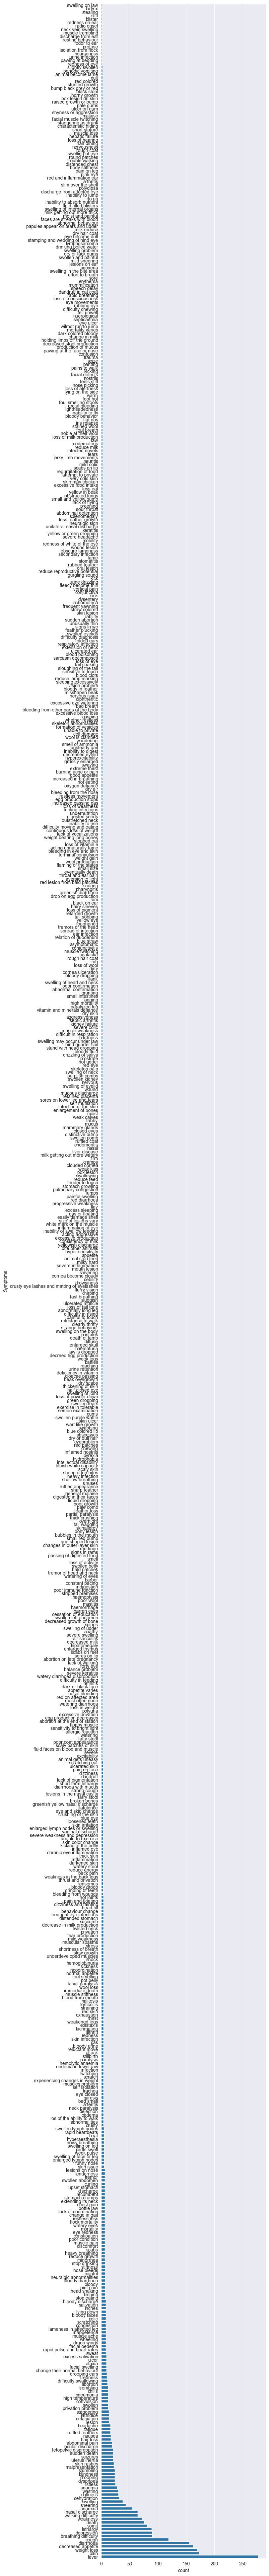

In [144]:
# sort the data in ascending order
sorted_data = data.sort_values(key=sorter, ascending=True)

# change figure size to make plot easier to read
plt.figure(figsize=(6.4, 100))

# plot the count plot using sorted data
sns.countplot(sorted_data)

Based on the count plot above, there were 18 symptoms in total that count as the rarest symptoms in the dataset and all of which only occur once in the dataset:
1. `swelling on jaw`
2. `larynx`
3. `stealing`
4. `stiff`
5. `blister`
6. `redness on ear`
7. `radio onset`
8. `neck vein swelling`
9. `muscle trembling`
10. `discharge from ear`
11. `resting behavior`
12. `odor to ear`
13. `profuse`
14. `isolation from flock`
15. `hoarseness`
16. `urine infection`
17. `pawing at bedding`
18. `redness of eye`

### 6. What percentage of animals had their symptoms marked as dangerous?
A pie chart will be useful for showing the proportion of dangerous to non-dangerous observations in the dataset.

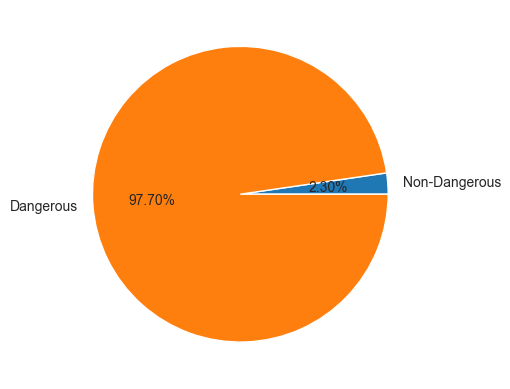

In [145]:
# define labels and values for each category
labels = ["Non-Dangerous","Dangerous"]
values = [animal_data["Dangerous"].value_counts()["no"], animal_data["Dangerous"].value_counts()["yes"]]

# plot the pie chart
plt.pie(values, labels=labels, autopct="%0.2f%%")

# display the pie chart
plt.show()

Hence, 2.30% of the animals were in a dangerous condition whereas 97.70% of the animals were in a non-dangerous condition.

### 7. Which symptom was most prevalent in cats?
A bar chart showing the distribution of symptoms that only occur in cats will reveal the most prevalent symptom in cats.
 - The observations where the animal is a cat must first be filtered from the dataset before the bar chart is made.

<Axes: xlabel='Cat Symptoms'>

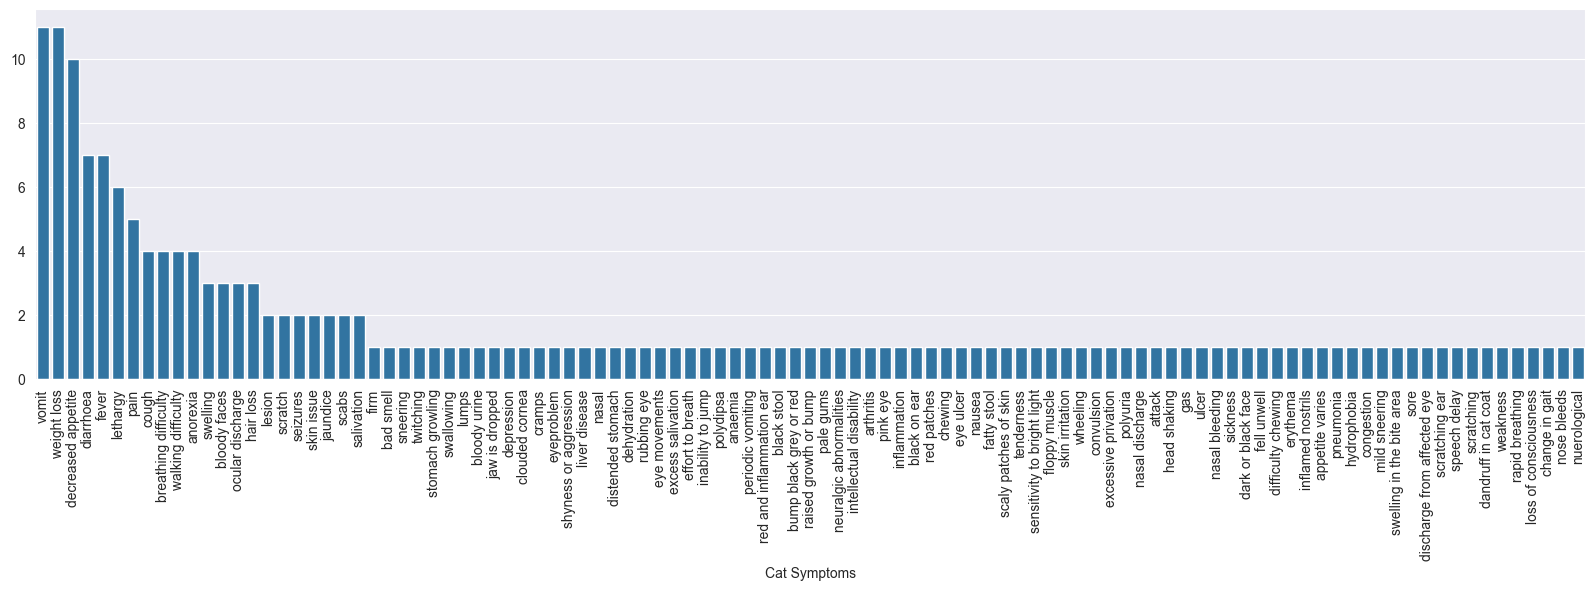

In [146]:
# filter cats from the dataset
cat_data = animal_data.groupby(by="Animal").get_group("cat")

# combine symptoms 1 - 5 in cats
cat_symptoms = pd.concat((cat_data["Symptom 1"], cat_data["Symptom 2"], cat_data["Symptom 3"], cat_data["Symptom 4"], cat_data["Symptom 5"]))
cat_symptoms.name = "Cat Symptoms"

# count the number of times each cat symptom occurs
cat_symptoms_count = cat_symptoms.value_counts()

# change figure size to make the chart easier to read
plt.figure(figsize=(20, 4.8))

# make the x-axis labels vertical
plt.xticks(rotation=90)

# plot the bar chart
sns.barplot(x=cat_symptoms_count.index, y=cat_symptoms_count.values)

Hence, the most prevalent symptoms in cats were `"vomit"` and `"weight loss"` and each occurred about 11 times in the dataset.

### 8. Which symptoms appear more in non-dangerous cases than they do in dangerous cases and of those symptoms which one had the highest non-dangerous occurrence to dangerous occurrence ratio?
This will help identify if there are any symptoms that are generally not dangerous.


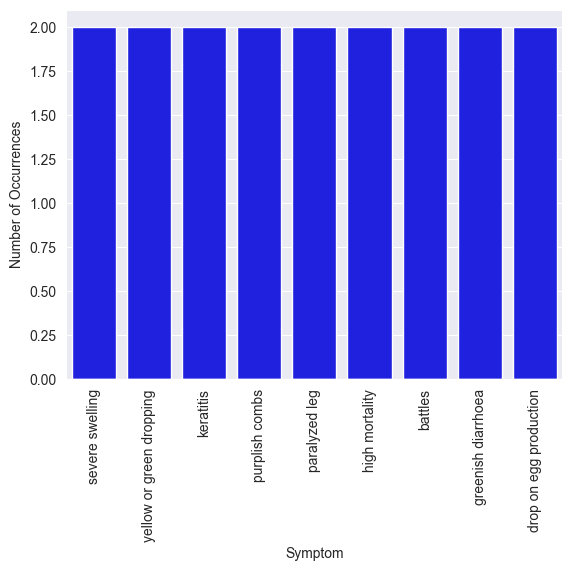

In [147]:
# merge symptoms 1-5 including their dangerous column values
symptoms = pd.concat((animal_data["Symptom 1"], animal_data["Symptom 2"], animal_data["Symptom 3"], animal_data["Symptom 4"], animal_data["Symptom 5"]))
symptoms.name = "Symptom"

dangerous = pd.concat((animal_data["Dangerous"], animal_data["Dangerous"], animal_data["Dangerous"], animal_data["Dangerous"], animal_data["Dangerous"]))  # repeat danger column 5 times to account for danger values of symptoms 1 to 5.
dangerous.name = "Dangerous"

dangerous_data = pd.concat((symptoms, dangerous), axis="columns")

# find distinct symptoms in the dataset
unique_symptoms = dangerous_data["Symptom"].unique()
unique_symptoms = pd.Series(unique_symptoms, name="Symptom")

# define function for counting dangerous vs non-dangerous cases for each symptom
def dangerous_counter(symptom):
    symptom_data = dangerous_data[dangerous_data["Symptom"] == symptom]
    n_dangerous = sum((1 for value in symptom_data["Dangerous"] if value == "yes"))
    n_non_dangerous = sum((1 for value in symptom_data["Dangerous"] if value == "no"))
    return n_dangerous, n_non_dangerous
    
# find dangerous count vs non-dangerous count for each unique symptom
dangerous_count = pd.Series([ dangerous_counter(symptom)[0] for symptom in unique_symptoms ])
dangerous_count.name = "Dangerous"

non_dangerous_count = pd.Series([ dangerous_counter(symptom)[1] for symptom in unique_symptoms ])
non_dangerous_count.name = "Non-Dangerous"

# combine symptoms and their dangerous vs non-dangerous counts into one data frame
danger_data = pd.concat((unique_symptoms, dangerous_count, non_dangerous_count), axis="columns")

# filter out symptoms that appear more in non-dangerous observations vs dangerous observations
non_danger_data = danger_data[danger_data["Dangerous"] < danger_data["Non-Dangerous"]]

# plot overlapping dangerous and non-dangerous counts unto 1 bar chart
ax = plt.subplots()
ax = sns.barplot(non_danger_data, x="Symptom", y="Non-Dangerous", color="blue")
ax = sns.barplot(non_danger_data, x="Symptom", y="Dangerous", color="red")
plt.xticks(rotation=90)
plt.ylabel("Number of Occurrences")
plt.show()

Hence, based on the barplots above, the following symptoms occurred more in non-dangerous cases than in dangerous cases:
1. Severe swelling
2. yellow or green dropping
3. keratitis
4. purplish combs
5. paralyzed leg
6. high mortality
7. battles
8. greenish diarrhoea
9. drop on egg production

Each of these symptoms had the same Non-dangerous to Dangerous occurrence ratio of 2:0.
Compared to other symptoms in the dataset, it is likelier that these symptoms are generally not "dangerous".

### 9. What is the percentage of animals that died?
Upon noticing that death was listed as one of the symptoms in the dataset, I was curious to find the percentage of animals for which death was a symptom.
 - A pie chart will be a good way to visualize this percentage.

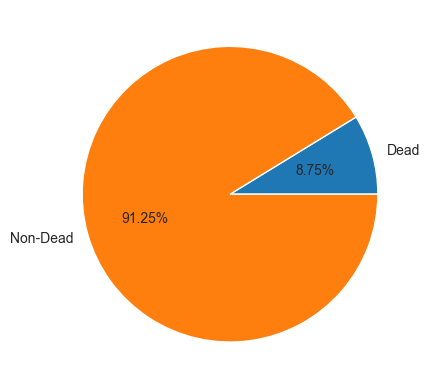

In [148]:
# count the number of dead vs non-dead animals
n_dead = 0
n_non_dead = 0
for index, row in animal_data.iterrows():
    if "death" in row.values:
        n_dead += 1
    else:
        n_non_dead += 1

# define pie chart labels and values
labels = ["Dead", "Non-Dead"]
values = [n_dead, n_non_dead]

# plot the pie chart
plt.pie(values, labels=labels, autopct="%0.2f%%")

# display the pie chart
plt.show()

Hence, 8.75 % of the animals in the dataset had death as a symptom whereas 91.25% did not have death as a symptom.

## Machine Learning Task

### 10. A) Train a machine learning model for classifying the condition of the animals as dangerous or not dangerous based on their symptoms.
The goal of this task is to build a machine learning model that given the animal and their symptoms, can predict whether the animal is in dangerous or non-dangerous condition.

 - This task is an example of a supervised binary classification task with two output classes: dangerous and non-dangerous.

 - The Support Vector Machine (SVM) algorithm is a good machine learning algorithm for binary classification tasks that can be used to solve this problem.

#### Install required library for machine learning:

In [149]:
# install scikit-learn library for machine learning.
# !pip install scikit-learn

#### Import required modules:

In [150]:
# import required modules
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### Encode the Data:
Since the data is fully qualitative, it must be encoded into a quantitative format before it can be used to train our machine learning model.
 - An encoding technique called label encoding will be used to encode all the values in the dataset.

In [151]:
# encode the animals in the dataset using label encoding
animal_encoder = LabelEncoder()
animal_encoder.fit(animal_data["Animal"])
animal_data["Animal"] = animal_encoder.transform(animal_data["Animal"])

# encode the symptoms in the dataset using label encoding
symptom_encoder = LabelEncoder()
symptom_encoder.fit(symptoms)
animal_data[["Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"]] = animal_data[["Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"]].apply(symptom_encoder.transform)

# encode the animal condition (dangerous vs non-dangerous) using label encoding
condition_encoder = LabelEncoder()
condition_encoder.fit(animal_data["Dangerous"])
animal_data["Dangerous"] = condition_encoder.transform(animal_data["Dangerous"])

# display the encoded dataset
animal_data.head()

Animal  Symptom 1  Symptom 2  Symptom 3  Symptom 4  Symptom 5  Dangerous
0       7        221        130        705        726        127          1
1       7        221        130        105        672        428          1
2       7        221        130        105        705         21          1
3       7        221         72        105        338        590          1
4       7        221        130        105        338         66          1

#### Split the dataset into training and testing sets:
The encoded dataset must be split so that a portion can be used to train the machine learning model, and the remaining portion can be used to evaluate the trained model.
 - A training size to testing size ratio of 60% to 40% will be used to split the dataset.

In [0]:
# split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(animal_data[["Symptom 1", "Symptom 2", "Symptom 3", "Symptom 4", "Symptom 5"]], animal_data["Dangerous"], train_size=0.6, test_size=0.4, random_state=42)

#### Train a Support Vector Machine classification model using the training dataset
The model will be tuned with the following hyperparameters:
 - Kernel: Radial Basis Function (`rbf`)
 - Gamma value: 0.1

These specific hyperparameters were selected because they provided the best model performance based on our previous tests.

In [ ]:
# instantiate support vector machine model
model = SVC(kernel="rbf", gamma=0.1, random_state=42)

# train support vector machine model with training data
model.fit(x_train, y_train)

#### Test the trained model using the testing dataset
 - The trained model will be used to make predictions of the condition of the animal (Dangerous or Non-Dangerous) given only the name of the animal and the 5 symptoms.
 - The predicted condition will then be used to evaluate the performance of the model.

In [ ]:
# test the support vector machine model
y_predicted = model.predict(x_test)

### 10. B) Visualize the performance of the trained machine learning model
3 important metrics for evaluating machine learning models include:
1. **Accuracy**
2. **Precision**
3. **Recall**

Each metric will be computed for the trained model and then visualized using a pie chart:

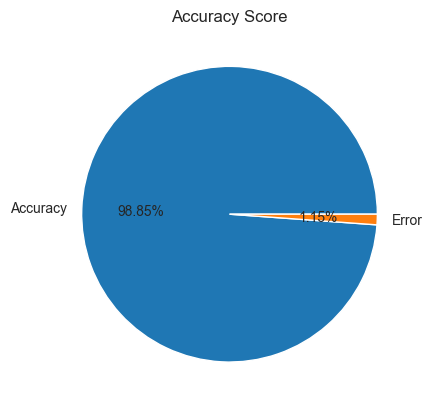

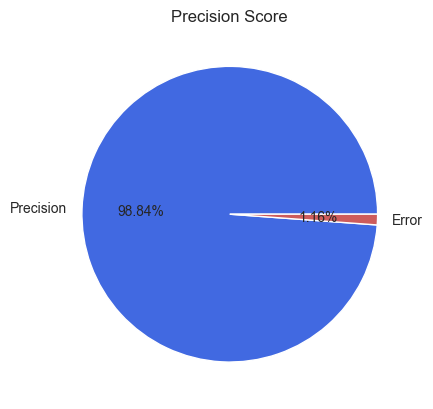

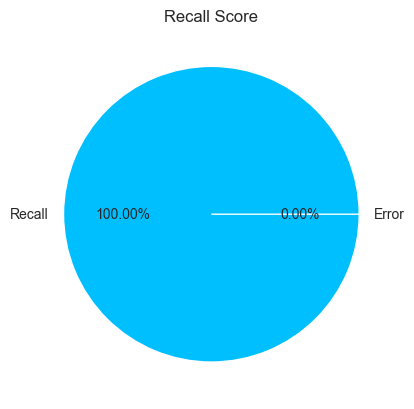

In [153]:
# calculate and visualize accuracy score
accuracy = accuracy_score(y_test, y_predicted)
labels = ["Accuracy", "Error"]
values = [accuracy, 1 - accuracy]
plt.pie(values, labels=labels, autopct="%0.2f%%")
plt.title("Accuracy Score")
plt.show()

# calculate and visualize precision score
precision = precision_score(y_test, y_predicted)
labels = ["Precision", "Error"]
values = [precision, 1-precision]
plt.pie(values, labels=labels, colors=["royalblue", "indianred"], autopct="%0.2f%%")
plt.title("Precision Score")
plt.show()

# calculate and visualize recall score
recall = recall_score(y_test, y_predicted)
labels = ["Recall", "Error"]
values = [recall, 1 - recall]
plt.pie(values, labels=labels, autopct="%0.2f%%", colors=["deepskyblue" ,"crimson"])
plt.title("Recall Score")
plt.show()